   ## Machine Learning in Healthcare-HW2- Tania Assaf & Wajdi Nicola 

## Theory Questions (28%)

1) To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

2) T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

3) A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

4) What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

## Answers:
Theoretical questions:
1) Model accuracy is a single parameter that gives us slight indication about how good our model is, while model performance includes several parameters that gives us bigger picture about our model. Specificity, sensitivity, positive and negative predicted values are parameters that we can get by using the model performance. Such parameters give us clearer picture about the model and it's performance, and help us calculate more parameters such as f1 that reflect the model performance better. It is hard to get accurate feedback about the model from single parameter, thus we think that model accuracy is the evaluation metric that is more important to us.

Example to explain our answer: let's assume naive classifier (which is clearly bad because it give the same labeling for all the elements). If we have a population of 100 tested that 10 of them are positive. A naive classifier that gives always negative will give us accuracy of 90%, while it is clearly a bad model, and thus model accuracy might be misleading.

2) By looking at the case as presented, we tend to choose the classifier that uses only BP and BMI. We believe that these features are the most relevant features for our case and will give us a better performance of the model since they are the most relevant and important.

Here we present the pros and cons for each classifier:

Based on all features: pros – such a classifier have a lot of information to learn from, this might enhance better performance and improve results of prediction. Cons – such a classifier will take much more time to run because of the big data input. In addition, if there is irrelevant feature as input for classification(as I in our case for example), this model may create relation that is not logical just because it has the data as an input. This might harm the learning process and the model performance and create irrelevant predictions.

Based on BMI and Bp: pros – less input data means faster model running and more smooth learning. In addition, emphasizing on the relevant data (and just on them) might improve the learning process and give a better classifier performance. Cons: less input data on the other hand might cause to situation of fast inaccurate learning and might affect the classifier performance and predicting hence it "was not trained to predict based on multiple features", and will create a limited classifier.

3) As mentioned in the question, the data is not linearly superable (cannot be ditigueshed by just looking at the data). Using a linear SVM will not help to separate the feature between patient and healthy cases pf T1D. However, using non-linear classifier might help. There might be a way to turn the data to separable in higher degree which might help the classifier to work and predict right. Thus, we advice the histologist to use non-linear SVM classifier.

4) Logistic Regression algorithm is based on a statistical model. This algorithm uses a logistic function (a sigmoid function) to calculate an output that depends on a binary model (it ranges from 0 to 1). On the other hand, linear SVM algorithm is based on the data's geometric properties to separate the data to different classes by a decision boundary or a hyperplane. In SVM the decision boundary is chosen to be the one with the maximum margin.

 The difference in the concept of hyper-parameter tuning is that LR has its λ as a hyper-parameter that regulates the cost function in both L1 and L2 regularizations. Its purpose is to keep the weights small on the one hand and on the other hand to avoid underfitting (which may occur in high values of λ). Choosing the right λ helps avoiding fitting issues. While SVM algorithm has C and γ as its hyper-parameters. As C adds a penalty for each misclassified data; if C value is high the model has high number of misclassified data so SVM tries to minimize this high penalty with small margin. while γ represents the fitting between the model and the data, as high values of γ may lead to over fitting.  



## Coding Assignment (72%)
The data for this exercise can be found in the attached file named HW2_data.csv. There are 565 patients in the database. The nurse who collected the data said that not all patients answered all the questions.

In [1]:
# imports
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

1) Load the data. Explain any preprocessing. (5%)

In [2]:
# 1
# Data Loading
T1D_data = pd.read_csv('HW2_data.csv')

Preprocessing explaination:
As we look at our data, we can see som missed values that might affect our learning process. There are several options to deal with the missed data such as: deleting the patients with missed values, filling the missed data with random data or selected data according to the feature. Since here we are talking about data that is binary we prefered not to fill the data with other valus that might affect the learning process.
In the data there is 565 patients,42 out of them have at least one missed feature. To understand the effect of these 42 patients we draw histograms of the labeling (positive,nigative) with and without these 42 patients:

(array([202.,   0.,   0.,   0., 321.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

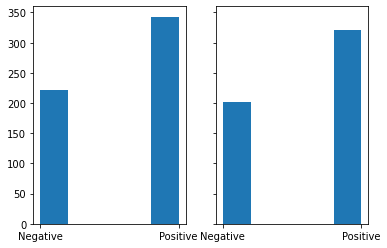

In [3]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False)
x = np.array(T1D_data['Diagnosis'])
y1 = T1D_data.copy()
y1.dropna(inplace=True)
y = y1['Diagnosis']
axs[0].hist(x, bins=5)
axs[1].hist(y, bins=5)

We can see that the positive-negative distribution of the data did not changed dramatically by removing the features with missed data. Thus we decided to deal with missed data in this case by deleting the 42 patients with missed data and to continue our learning according to the rest 523 patients.
note: there is a slight difference between the histogram we saw it clearer in pyCharm, but still not changing the data dramatically.

In [4]:
# Preprocessing
T1D_data.dropna(inplace=True)

2) Perform a test-train split of 20% test. (5%)

answer: For the learning process, we split our data to 80% train and 20 % test. To ensure good split we used stratified fashion for better training and testing of the model. 

In [5]:
#2
# Data Split
features = ['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Diagnosis','Family History']
x_cols = ['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']
X = T1D_data[x_cols]
y = T1D_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

3) Provide a detailed visualization and exploration of the data. (10%)

You should at least include:

3.a. An analysis to show that the distribution of the features is similar between test and train.

In [6]:
#3
# a
col_YN = ['Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity']
# col1 = ['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Diagnosis','Family History']
col1 = col_YN +['Gender','Family History','Diagnosis']
col2 = [0]*len(col_YN)
for i,feature in enumerate(col_YN):
    col2[i] = (X_train[feature].value_counts(normalize=True)['Yes'])*100
col2+=[(X_train['Gender'].value_counts(normalize=True)['Female'])*100] #In 'Gender' we chose Female as positive feature for comparison
col2+=[(X_train['Family History'].value_counts(normalize=True)[1])*100] #in 'Family History' we chose 1 as positive feature for comparison
col2+=[(y_train.value_counts(normalize=True)['Positive'])*100] #in 'Diagnosis' we chose 'Positive' as positive feature for comparison
col3 = [0]*len(col_YN)
for i,feature in enumerate(col_YN):
    col3[i] = (X_test[feature].value_counts(normalize=True)['Yes'])*100
col3+=[(X_test['Gender'].value_counts(normalize=True)['Female'])*100] #In 'Gender' we chose Female as positive feature for comparison
col3+=[(X_test['Family History'].value_counts(normalize=True)[1])*100] #in 'Family History' we chose 1 as positive feature for comparison
col3+=[(y_test.value_counts(normalize=True)['Positive'])*100] #in 'Diagnosis' we chose 'Positive' as positive feature for comparison
col4 = [0]*len(col3)
for i in range(len(col4)):
    col4[i]=col2[i]-col3[i]
table = pd.DataFrame(col1)
table.loc[:,1] = col2
table.loc[:,3] = col3
table.loc[:,4] = col4
table.columns = ['feature','Train %', 'Test %', 'Delta %']
table

,feature,Train %,Test %,Delta %
0,Increased Urination,50.478469,45.714286,4.764183
1,Increased Thirst,46.172249,38.095238,8.077011
2,Sudden Weight Loss,41.626794,40.952381,0.674413
3,Weakness,58.133971,60.000000,-1.866029
4,Increased Hunger,46.650718,40.952381,5.698337
5,Genital Thrush,20.334928,29.523810,-9.188881
6,Visual Blurring,45.933014,39.047619,6.885395
7,Itching,49.521531,44.761905,4.759626
8,Irritability,24.641148,22.857143,1.784005
9,Delayed Healing,47.846890,38.095238,9.751652


The tabe shows that the split between the train and test is close enough in all the feature and the split is balanced good. We can see that the best split is in the feature 'Diagnosis' which make sense because we asked the split function to split according to the diagnosis label.

Questions:

i. What issues could an imbalance of features between train and test cause?

ii. How could you solve the issue?

Answers:

i. Balance of features between test and train is critical for ML performance. Imbalance of features might cause to bias in the learning process. Such a bias might effect the model performance and in some cases might lead to naive model (if for instance all values in the train were with the same label).

ii. Using 'sratify' option when splitting the data is useful to avoid imbalanced split. This option splits our data equally as possible between the test and the train and help us avoid bias in learning.

What about the age? 
For the feature age, let's see how the ages are distributed between the train and the test:

(array([1., 1., 0., 0., 0., 1., 0., 0., 7., 0., 1., 1., 0., 2., 0., 1., 9.,
        0., 3., 0., 0., 5., 0., 3., 0., 7., 0., 0., 2., 0., 4., 2., 0., 7.,
        0., 0., 5., 0., 4., 0., 0., 3., 0., 1., 0., 1., 2., 0., 5., 0., 3.,
        4., 0., 1., 0., 3., 1., 0., 2., 0., 3., 2., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 2., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([25. , 25.6, 26.2, 26.8, 27.4, 28. , 28.6, 29.2, 29.8, 30.4, 31. ,
        31.6, 32.2, 32.8, 33.4, 34. , 34.6, 35.2, 35.8, 36.4, 37. , 37.6,
        38.2, 38.8, 39.4, 40. , 40.6, 41.2, 41.8, 42.4, 43. , 43.6, 44.2,
        44.8, 45.4, 46. , 46.6, 47.2, 47.8, 48.4, 49. , 49.6, 50.2, 50.8,
        51.4, 52. , 52.6, 53.2, 53.8, 54.4, 55. , 55.6, 56.2, 56.8, 57.4,
        58. , 58.6, 59.2, 59.8, 60.4, 61. , 61.6, 62.2, 62.8, 63.4, 64. ,
        64.6, 65.2, 65.8, 66.4, 67. , 67.6, 68.2, 68.8, 69.4, 70. , 70.6,
        71.2, 71.8, 72.4, 73. , 

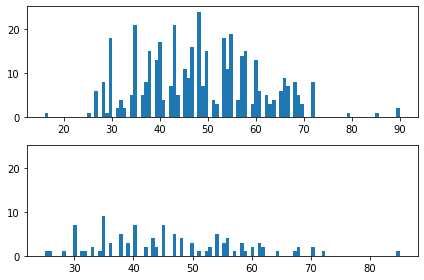

In [7]:
age_train = list(X_train['Age'])
age_test = X_test['Age']
fig_age, axs_age = plt.subplots(2, 1, sharey=True, tight_layout=True)
axs_age[0].hist(age_train, bins=100)
axs_age[1].hist(age_test, bins=100)

As we can see the ages are distributed good in both cases (train and test), which means that the data is also balanced regarding the age (we took a variety of ages in both cases).

3.b. Plots to show the relationship between feature and label

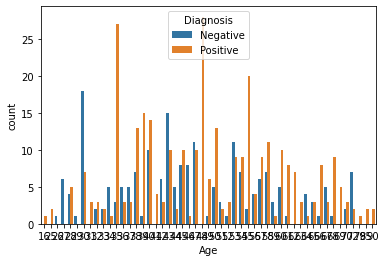

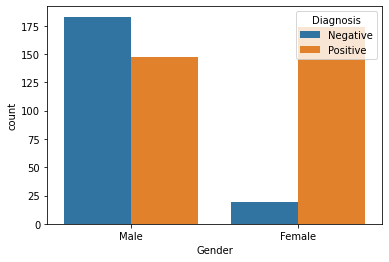

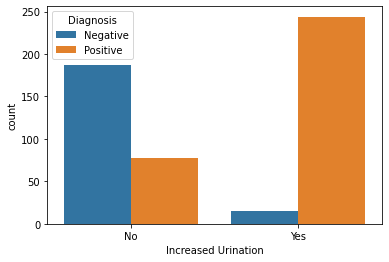

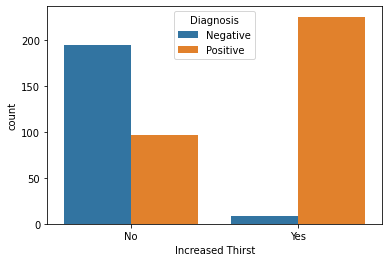

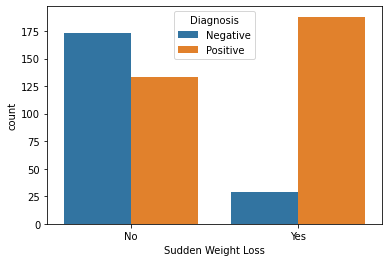

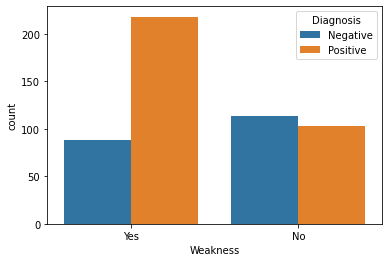

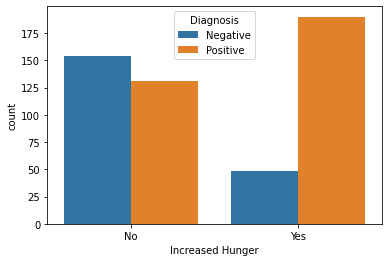

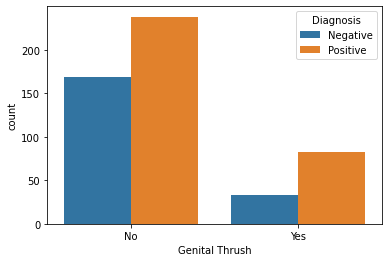

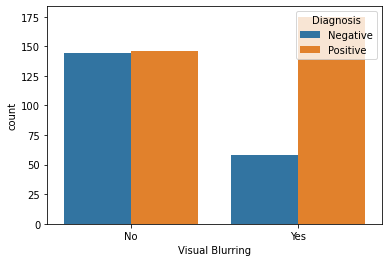

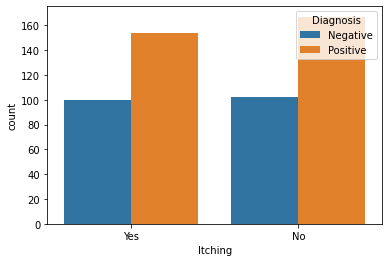

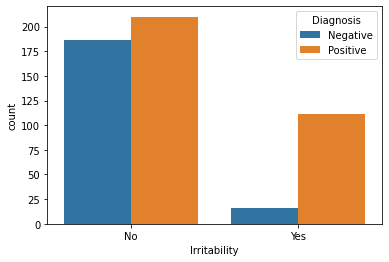

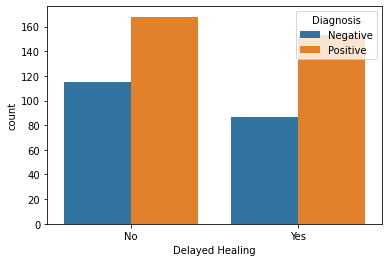

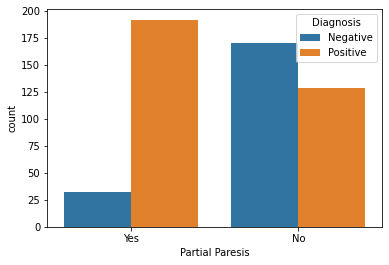

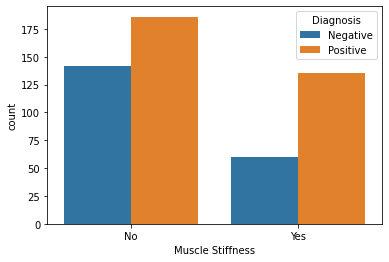

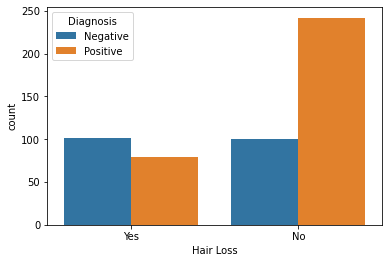

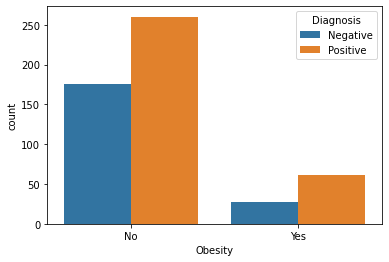

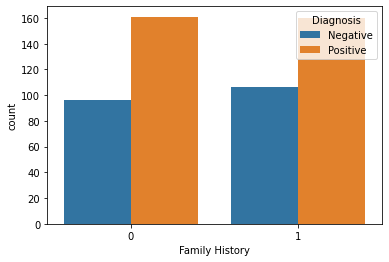

In [8]:
for feat in x_cols:
    ax = sns.countplot(x=T1D_data[feat],hue='Diagnosis',data = T1D_data)
    plt.show()

# ax = sns.countplot(x=T1D_data['Obesity'],hue='Diagnosis',data = T1D_data)


3.c. Additional plots that make sense given the mostly binary nature of this dataset.

Using a pie-plot let's look at the diagnosis in our data by percentage. In addition, let's see that the answers for the quistion (features) are devided. For instance, we want to make sure that not all of our patients have famly history. if all the features are devided that means we have a good data that reprisent "random" population. This s good for our learning model.

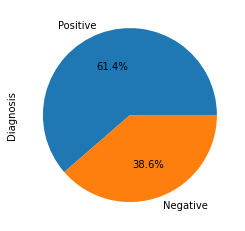

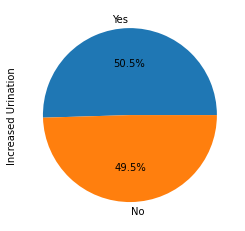

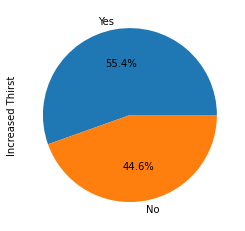

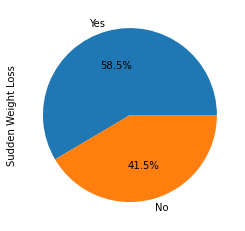

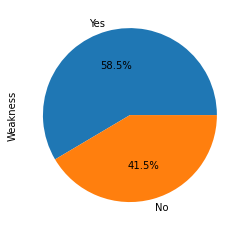

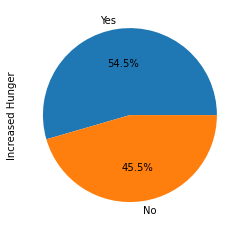

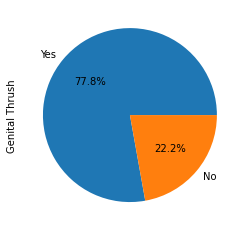

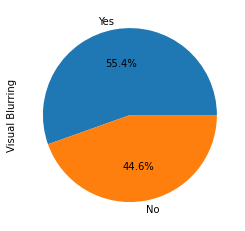

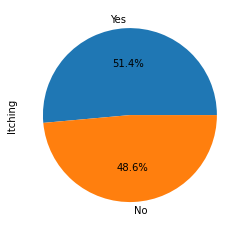

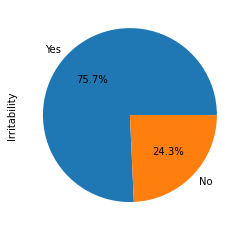

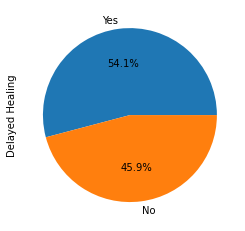

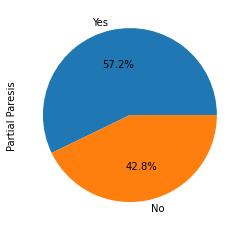

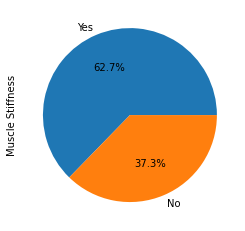

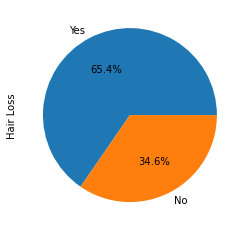

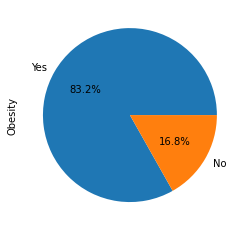

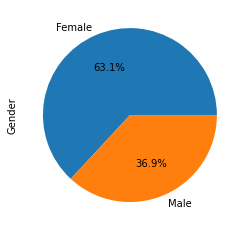

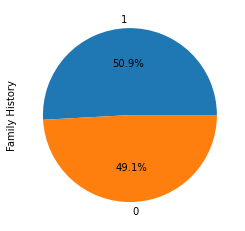

In [9]:
y.value_counts().plot(kind="pie", labels=['Positive','Negative'], autopct='%1.1f%%') 
plt.show()

for feature in ['Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity']:
    X[feature].value_counts().plot(kind="pie", labels=['Yes','No'], autopct='%1.1f%%') 
    plt.show()
X['Gender'].value_counts().plot(kind="pie", labels=['Female','Male'], autopct='%1.1f%%') 
plt.show()
X['Family History'].value_counts().plot(kind="pie", labels=['1','0'], autopct='%1.1f%%') 
plt.show()


We can see that most of the features are devided good. There are some features that have majoroty of positive or negative answer. For instant, in our data there is a lot of people obesity 83.2%. This means that we might not have enough people without the symptom to "study". In general, we see a good devision between the binary options of the features.

3.d. State any insights you have

i. Was there anything unexpected?

ii. Are there any features that you feel will be particularly important to your model? Explain why.

Answers:

i. According to the graphs, it seems like gender plays a major role in diabetes diagnosis. As we cans see from the graph that shows the relation between feature and diagnosis, most of the women who participated in this study were diagnosed as positive. On the other hand, men are devided between positive and negative.that was intersting and unexpected for us.

ii. By looking at the graphs, we can see that the features of  'Increased Urination','Increased Thirst' and 'Sudden Whight Loss' have a significant differnces in the diagnosis according to th feature. We believe these features will play a major role in the labeling (predicting of the model) and thus the have the highest importance between all the features.

4) Encode all your data as one hot vectors. (5%)

In this question we build new vectors as on hot vectors. The result is our data (X_train,X_test,y_tran,y_test) encoded as one hot vectors. The age is a numerical value, thus it cannot be implemented as binary vector thus we ignored the age feature in the one hot vectors.

In [10]:
#4 One Hot Vectors
T1D_data_h = T1D_data.replace('Yes',1).replace('No',0).replace('Male',0).replace('Female',1).replace('Negative',0).replace('Positive',1)
X_h = T1D_data_h[x_cols]
y_h = T1D_data_h['Diagnosis']
X_train_h, X_test_h, y_train_h, y_test_h= train_test_split(X_h, y_h, test_size=0.2, random_state=10, stratify=y)
features_vec = list(X_train_h.keys()) #without 'age' (numerical) and 'Diagnosis' (the label)
X_train_h = X_train_h.values
X_test_h = X_test_h.values
y_train_h = y_train_h.values
y_test_h = y_test_h.values
# ignoring the non binary feature 'Age'
T1D_data_hot = T1D_data_h.iloc[:,1:]
X_train_hot = X_train_h[:,1:]
X_test_hot = X_test_h[:,1:]
y_train_hot = y_train_h
y_test_hot = y_test_h


5) Choose, build and optimize Machine Learning Models: (20%)
    
a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:
    
i. Train one or more linear model on your training set

ii. Train one or more non-linear models on your training set

b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, ACC).

Answer:

as we can see after runnung the code below, in penalty = l1 we got that the best performance regarding AUC is lmbda=1, where in penalty = l2 we got lmbda = 5. We will choose these values accordingly to continue with our analysis.


11/11 lambda values, processed folds: 100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 116.96it/s]


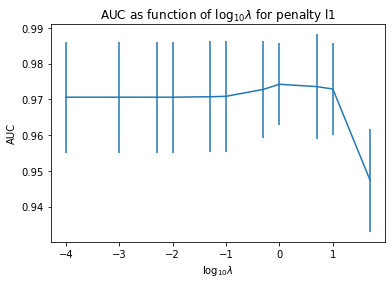

Best lambda value for l1 is 1
11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 63.30it/s]


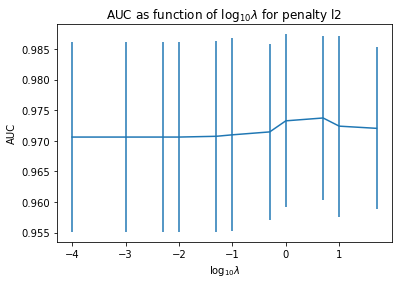

Best lambda value for l2 is 5


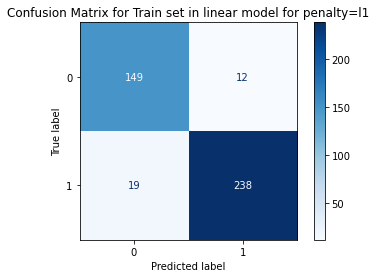

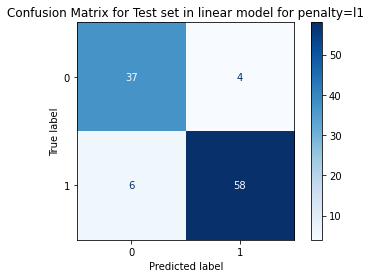

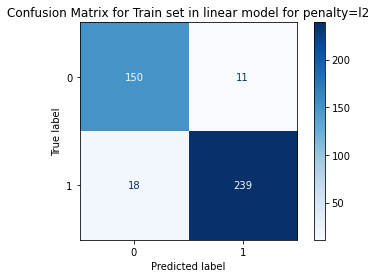

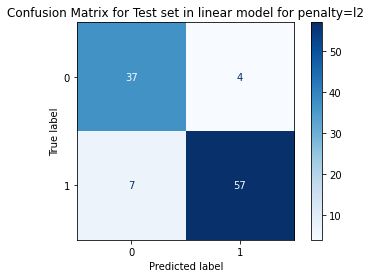

The parameters for linear model with penalty=l1:
The Train Parameters:
Train AUC is 0.99. 
Train F1 is 0.94. 
Train Loss is 0.15. 
Train Accuracy is 0.93.
The Test Parameters:
Test AUC is 0.96. 
Test F1 is 0.92. 
Test Loss is 0.25. 
Test Accuracy is 0.90.
The parameters for linear model with penalty=l2:
The Train Parameters:
Train AUC is 0.98. 
Train F1 is 0.94. 
Train Loss is 0.17. 
Train Accuracy is 0.93.
The Test Parameters:
Test AUC is 0.96. 
Test F1 is 0.91. 
Test Loss is 0.25. 
Test Accuracy is 0.90.
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] svm__C=1, svm__degree=2, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=2, svm__kernel=rbf, accuracy=(train=0.982, test=0.964), f1=(train=0.985, test=0.970), precision=(train=0.995, test=0.980), recall=(train=0.976, test=0.961), roc_auc=(train=1.000, test=0.995), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=2, svm__kernel=rbf, accu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=2, svm__kernel=rbf, accuracy=(train=0.982, test=0.952), f1=(train=0.985, test=0.959), precision=(train=0.995, test=1.000), recall=(train=0.976, test=0.922), roc_auc=(train=0.999, test=1.000), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=2, svm__kernel=rbf, accuracy=(train=0.985, test=0.964), f1=(train=0.988, test=0.970), precision=(train=0.990, test=1.000), recall=(train=0.985, test=0.941), roc_auc=(train=0.999, test=0.999), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=2, svm__kernel=poly, accuracy=(train=0.952, test=0.929), f1=(train=0.962, test=0.941), precision=(train=0.952, test=0.941), recall=(train=0.971, test=0.941), roc_auc=(train=0.988, test=0.961), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=2, svm__kernel=poly, accuracy=(train=0.943, test=0.940),

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.0s finished


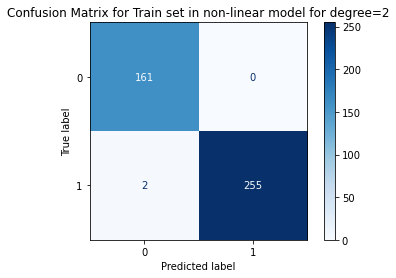

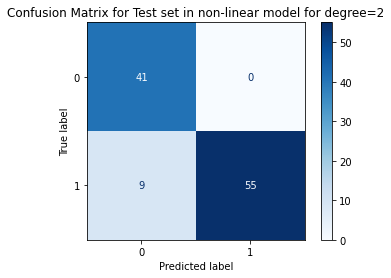

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] svm__C=1, svm__degree=3, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.982, test=0.964), f1=(train=0.985, test=0.970), precision=(train=0.995, test=0.980), recall=(train=0.976, test=0.961), roc_auc=(train=1.000, test=0.995), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.982, test=0.964), f1=(train=0.985, test=0.970), precision=(train=0.995, test=1.000), recall=(train=0.976, test=0.942), roc_auc=(train=0.999, test=0.996), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.988, test=0.940), f1=(train=0.990, test=0.953), precision=(train=0.990, test=0.927), recall=(train=0.990, test=0.981), roc_auc=(train=1.000, test=0.990), total=   0.0s
[CV] svm__C=1, svm__degre

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.7s finished


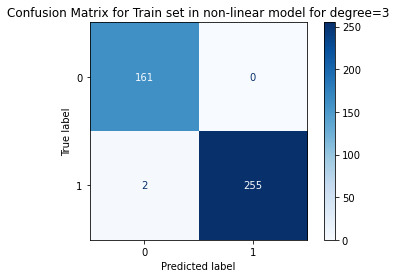

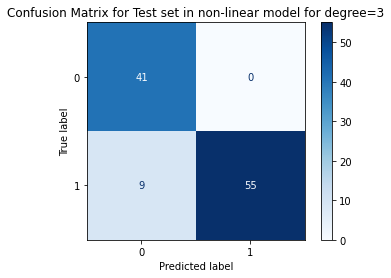

The parameters for non-linear model with degree = 2:
The Train Parameters:
Train AUC is 1.00. 
Train F1 is 1.00. 
Train Loss is 0.03. 
Train Accuracy is 1.00.
The Test Parameters:
Test AUC is 0.99. 
Test F1 is 0.92. 
Test Loss is 0.20. 
Test Accuracy is 0.91.
The parameters for non-linear model with degree = 3:
The Train Parameters:
Train AUC is 1.00. 
Train F1 is 1.00. 
Train Loss is 0.03. 
Train Accuracy is 1.00.
The Test Parameters:
Test AUC is 0.99. 
Test F1 is 0.92. 
Test Loss is 0.19. 
Test Accuracy is 0.91.


In [11]:
#5
# a
# Training set
def check_penalty(penalty='none'):
    if penalty == 'l1':
        solver='liblinear'
    if penalty == 'l2' or penalty == 'none':
        solver='lbfgs'
    return solver
# Now we will split the training set into training and validation and we will test some values of lambda to check which one will give us the highest AUC value.
#In addtion, we need to choose our penalty, thus we will creat new fucntion named valid_and_tune as mentioned here, this function will help us check the best lambda and penalty to creat our model.

def valid_and_tune(penal,X_train,Y_train):
    lmbda = np.array([0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50])
    n_splits = 5 #as requested
    skf = SKFold(n_splits=n_splits, random_state=10, shuffle=True)
    # AUC_train = np.zeros((2, len(lmbda)))
    AUC_valid = np.zeros((2, len(lmbda)))

    solver = check_penalty(penalty=penal)
    scaler = StandardScaler()
    for idx, lmb in enumerate(lmbda):
        C = 1 / lmb
        log_reg = LogisticRegression(random_state=10, max_iter=1000, solver=solver, C=C, penalty=penal)
        with tqdm(total=n_splits, file=sys.stdout, position=0, leave=True) as pbar:
            k = 0  # index per split per lambda
            AUC_valid_fold = np.zeros(n_splits)

            for train_index, val_index in skf.split(X_train_h,y_train_h):
                pbar.set_description('%d/%d lambda values, processed folds' % ((1 + idx), len(lmbda)))
                pbar.update()
                x_train_fold, x_val_fold = X_train_h[train_index, :], X_train_h[val_index, :]
                y_train_fold, y_val_fold = y_train_h[train_index], y_train_h[val_index]
                x_train_fold = scaler.fit_transform(x_train_fold)
                x_val_fold = scaler.transform(x_val_fold)
                log_reg.fit(x_train_fold, y_train_fold)
                AUC_valid_fold[k] = roc_auc_score(y_val_fold,log_reg.predict_proba(x_val_fold)[:,1])
                k += 1
            AUC_valid[0,idx] = AUC_valid_fold.mean()
            AUC_valid[1,idx] = AUC_valid_fold.std()
    # plt.errorbar(np.log10(lmbda), J_train[0, :], yerr=J_train[1, :])
    plt.errorbar(np.log10(lmbda), AUC_valid[0, :], yerr=AUC_valid[1, :])
    plt.xlabel('$\log_{10}\lambda$')
    plt.ylabel('AUC')
    plt.title('AUC as function of $\log_{10}\lambda$ for penalty %s' % penal)
    plt.show()
    #findinf lambda value
    AUC_means = list(AUC_valid[0,:])
    max_AUC = max(AUC_means)
    max_indx = AUC_means.index(max_AUC)
    lam = lmbda[max_indx]
    return (solver,lam,AUC_valid)

# Finding the best lambda for l1 and l2
#for l1
l_one = valid_and_tune('l1',X_train_h,y_train_h)
print('Best lambda value for l1 is %i' % l_one[1])
#for l2
l_two = valid_and_tune('l2',X_train_h,y_train_h)
print('Best lambda value for l2 is %i' % l_two[1])

#a(i)+b for linear model - Training linear model
#First we will build a help function (we call it lin_trainer) that hepls us Train the linear model according to the solver and the penalty.
def lin_trainer(x_tr,x_tst,y_train_h,y_test_h,penal,solver,lmbda):
    C = 1/lmbda
    log_reg = LogisticRegression(random_state=10, max_iter=1000, solver=solver, C=C, penalty=penal)
    log_reg.fit(x_tr, y_train_h)
    y_pred_test = log_reg.predict(x_tst)
    y_pred_proba_test = log_reg.predict_proba(x_tst)
    y_pred_train = log_reg.predict(x_tr)
    y_pred_proba_train = log_reg.predict_proba(x_tr)

    #parameter calculation
    calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
    calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
    calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
    calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

    #for the Train
    plot_confusion_matrix(log_reg, x_tr, y_train_h, cmap=plt.cm.Blues)
    plt.grid(False)
    plt.title('Confusion Matrix for Train set in linear model for penalty=%s'%penal)
    plt.show()
    TN_train = calc_TN(y_train_h, y_pred_train)
    FP_train = calc_FP(y_train_h, y_pred_train)
    FN_train = calc_FN(y_train_h, y_pred_train)
    TP_train = calc_TP(y_train_h, y_pred_train)
    PPV_train = TP_train / (TP_train + FP_train)
    SE_train = TP_train / (TP_train + FN_train) #Sensitivity
    SP_train = TN_train / (TN_train + FP_train) #Specificity
    NPV_train = TN_train / (TN_train + FN_train)
    ACC_train = (TN_train + TP_train ) / (TN_train  + FN_train + TP_train + FP_train )
    F1_train = (2 * (PPV_train * SE_train)) / (PPV_train + SE_train)
    AUROC_train = roc_auc_score(y_train_h, y_pred_proba_train[:, 1])
    Loss_train = log_loss(y_train_h, y_pred_proba_train)

    #for the Test
    plot_confusion_matrix(log_reg, x_tst, y_test_h, cmap=plt.cm.Blues)
    plt.grid(False)
    plt.title('Confusion Matrix for Test set in linear model for penalty=%s'%penal)
    plt.show()
    TN_test = calc_TN(y_test_h, y_pred_test)
    FP_test = calc_FP(y_test_h, y_pred_test)
    FN_test = calc_FN(y_test_h, y_pred_test)
    TP_test = calc_TP(y_test_h, y_pred_test)
    PPV_test = TP_test / (TP_test + FP_test)
    SE_test = TP_test / (TP_test + FN_test)
    Sp_test = TN_test / (TN_test + FP_test)
    NPV_test = TN_test/ (TN_test + FN_test)
    ACC_test = (TP_test + TN_test) / (TN_test + FN_test + TP_test + FP_test )
    F1_test = (2 * (PPV_test * SE_test)) / (PPV_test + SE_test)
    AUROC_test = roc_auc_score(y_test_h, y_pred_proba_test[:, 1])
    Loss_test = log_loss(y_test_h, y_pred_proba_test)

    return [AUROC_train,F1_train,Loss_train,ACC_train,AUROC_test,F1_test,Loss_test,ACC_test]

#Now we go back to the Train-Test split we did at the begining to accomplish linear training model.
scaler = StandardScaler()
x_tr = scaler.fit_transform(X_train_h)
x_tst = scaler.transform(X_test_h)
lmbda_l1 = 1
lmbda_l2 = 5
#parameter calculation for l1
[AUROC_train_l1,F1_train_l1,Loss_train_l1,ACC_train_l1,AUROC_test_l1,F1_test_l1,Loss_test_l1,ACC_test_l1] = lin_trainer(x_tr,x_tst,y_train_h,y_test_h,penal='l1',solver=l_one[0],lmbda = l_one[1])
#parameter calculation for l2
[AUROC_train_l2,F1_train_l2,Loss_train_l2,ACC_train_l2,AUROC_test_l2,F1_test_l2,Loss_test_l2,ACC_test_l2] = lin_trainer(x_tr,x_tst,y_train_h,y_test_h,penal='l2',solver=l_two[0],lmbda = l_two[1])

print('The parameters for linear model with penalty=l1:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_l1,F1_train_l1,Loss_train_l1,ACC_train_l1))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_l1,F1_test_l1,Loss_test_l1,ACC_test_l1))
print('The parameters for linear model with penalty=l2:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_l2,F1_train_l2,Loss_train_l2,ACC_train_l2))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_l2,F1_test_l2,Loss_test_l2,ACC_test_l2))

#a(ii)+b for non-linear model - Training non-linear model
#First we will build a help function (we call it non-lin_trainer) that hepls us Train the non-lin_trainer model according to SVM with differnt model degrees
def non_lin_trainer(x_tr,x_tst,y_train_h,y_test_h,degree):
    #Note for us : we chosed the names od x_train as x_tr and x_test as x_tst as in the previous function. It is ok as these are inputs and internal parameters only for the function and will not be saved, as for the rest of the parameters.
    n_splits = 5 #as requested
    skf = SKFold(n_splits=n_splits, random_state=10, shuffle=True)
    svc = SVC(probability=True)
    C = np.array([1, 10 , 100, 1000])
    pipe = Pipeline(steps=[('svm', svc)])
    svm_nonlin = GridSearchCV(estimator=pipe,param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'], 'svm__degree': [degree]},scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'], cv=skf,refit='roc_auc', verbose=3, return_train_score=True)
    svm_nonlin.fit(x_tr, y_train_h)
    best_svm_nonlin = svm_nonlin.best_estimator_
    print('best parameters are %s' %svm_nonlin.best_params_)
    y_pred_train = best_svm_nonlin.predict(x_tr)
    y_pred_proba_train = best_svm_nonlin.predict_proba(x_tr)
    y_pred_test = best_svm_nonlin.predict(x_tst)
    y_pred_proba_test = best_svm_nonlin.predict_proba(x_tst)

    #parameter calculation
    calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
    calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
    calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
    calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

    #for the Train
    plot_confusion_matrix(svm_nonlin, x_tr, y_train_h, cmap=plt.cm.Blues)
    plt.grid(False)
    plt.title('Confusion Matrix for Train set in non-linear model for degree=%s'%degree)
    plt.show()
    TN_train = calc_TN(y_train_h, y_pred_train)
    FP_train = calc_FP(y_train_h, y_pred_train)
    FN_train = calc_FN(y_train_h, y_pred_train)
    TP_train = calc_TP(y_train_h, y_pred_train)
    PPV_train = TP_train / (TP_train + FP_train)
    SE_train = TP_train / (TP_train + FN_train) #Sensitivity
    SP_train = TN_train / (TN_train + FP_train) #Specificity
    NPV_train = TN_train / (TN_train + FN_train)
    ACC_train = (TN_train + TP_train ) / (TN_train  + FN_train + TP_train + FP_train )
    F1_train = (2 * (PPV_train * SE_train)) / (PPV_train + SE_train)
    AUROC_train = roc_auc_score(y_train_h, y_pred_proba_train[:, 1])
    Loss_train = log_loss(y_train_h, y_pred_proba_train)

    #for the Test
    plot_confusion_matrix(svm_nonlin, x_tst, y_test_h, cmap=plt.cm.Blues)
    plt.grid(False)
    plt.title('Confusion Matrix for Test set in non-linear model for degree=%s'%degree)
    plt.show()
    TN_test = calc_TN(y_test_h, y_pred_test)
    FP_test = calc_FP(y_test_h, y_pred_test)
    FN_test = calc_FN(y_test_h, y_pred_test)
    TP_test = calc_TP(y_test_h, y_pred_test)
    PPV_test = TP_test / (TP_test + FP_test)
    SE_test = TP_test / (TP_test + FN_test)
    Sp_test = TN_test / (TN_test + FP_test)
    NPV_test = TN_test/ (TN_test + FN_test)
    ACC_test = (TP_test + TN_test) / (TN_test + FN_test + TP_test + FP_test )
    F1_test = (2 * (PPV_test * SE_test)) / (PPV_test + SE_test)
    AUROC_test = roc_auc_score(y_test_h, y_pred_proba_test[:, 1])
    Loss_test = log_loss(y_test_h, y_pred_proba_test)

    return [AUROC_train,F1_train,Loss_train,ACC_train,AUROC_test,F1_test,Loss_test,ACC_test]

#Now we go back to the Train-Test split we did at the begining to accomplish non-linear training model. We choosed two degrees for our model degree2 = 2, degree3=3 (non-linear degrees).
degree2 = 2
degree3 = 3
#parameter calculation for degree = 2
[AUROC_train_deg2,F1_train_deg2,Loss_train_deg2,ACC_train_deg2,AUROC_test_deg2,F1_test_deg2,Loss_test_deg2,ACC_test_deg2] = non_lin_trainer(x_tr,x_tst,y_train_h,y_test_h,degree=degree2) #here it is the same x_tr and x_tst as in the inputs for the previous function
#parameter calculation for degree = 3
[AUROC_train_deg3,F1_train_deg3,Loss_train_deg3,ACC_train_deg3,AUROC_test_deg3,F1_test_deg3,Loss_test_deg3,ACC_test_deg3] = non_lin_trainer(x_tr,x_tst,y_train_h,y_test_h,degree = degree3) #here it is the same x_tr and x_tst as in the inputs for the previous function

print('The parameters for non-linear model with degree = 2:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_deg2,F1_train_deg2,Loss_train_deg2,ACC_train_deg2))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_deg2,F1_test_deg2,Loss_test_deg2,ACC_test_deg2))
print('The parameters for non-linear model with degree = 3:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_deg3,F1_train_deg3,Loss_train_deg3,ACC_train_deg3))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_deg3,F1_test_deg3,Loss_test_deg3,ACC_test_deg3))


c. What performs best on this dataset? Linear or non-linear models?

Answer:
As we can see from the results (models parameters and confusion matrixes) it is clear that the non-linear model is better that the linear model. With the non-linear model we get better true positive and negative and less false positive and negative in general. A logical explanation for that is that our model probably is not linearly separable and it is better separable in the non-linear case.


6) Feature Selection (10%)

a. As seen previously, a Random Forest Network can be used to explore feature importance. Train a Random Forest on your data.

i. What are the 2 most important features according to the random forest.

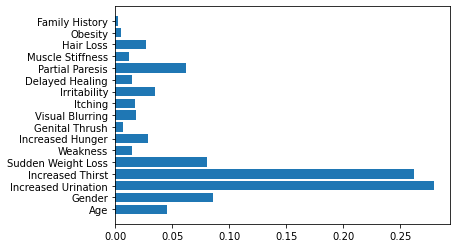

In [12]:
#6
rfc = RandomForestClassifier(max_depth=4, random_state=0, criterion='gini')
rfc.fit(x_tr, y_train_h)
y_pred_test = rfc.predict(x_tst)
y_pred_proba_test = rfc.predict_proba(x_tst)
imp = rfc.feature_importances_
plt.barh(x_cols,imp)
plt.show()


Answer: As we can see from the Rndom Forest histogram, the most important features are 'Increase Urination' and 'Increase Thirst'. We can see that they have importance amplitude much bigger than the other features which tells us how important these features are. 

ii. Does this match up exactly with the feature exploration you did?

Answer: Yes, we can see that we made a good exploration at the begining by just visualizing the data in appropriate histograms. We saw in the histograms that the most emportant features that will help us get a good performance of the model were 'Increase Urination', 'Increase Thirst' and age. This is what we see also here in the Random Forest histogram. Here we saw 2 important things: a tool to help us see the importance of each feature and how much it contribute to the learning pricess, and we saw the importance of visualizing the data properly before getting down to buisness so that we can get a good idea about our data which will help us in chosing the right preprocessing and will help us to get a good performance from the model. 

7) Data Separability Visualization: (20%)

## Bonus Questions:

a. Perform dimensionality reduction on the dataset so that you can plot your data in a 2d plot (show samples with positive and negative labels in different colors).

b. How separable is your data when reduced to just two features?

c. Train the same models above on the dimensionality-reduced training set.

## Questions

d. Train the same models on the best two features from section 6.

e. What performs better? 2 features of the reduced dimensionality.

Solution b+e:

11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 93.35it/s]


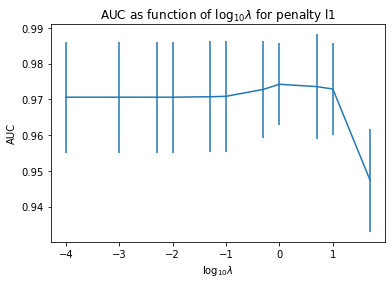

Best lambda value for l1 is 1
11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 59.95it/s]


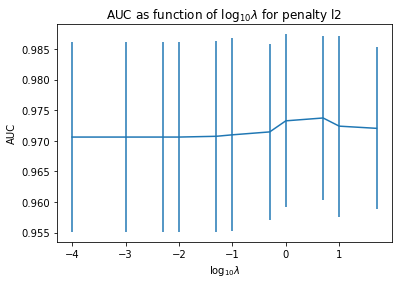

Best lambda value for l2 is 5


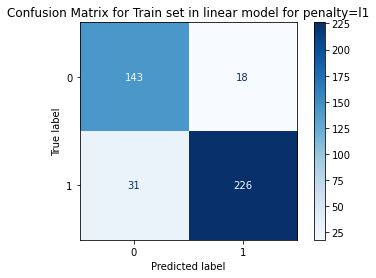

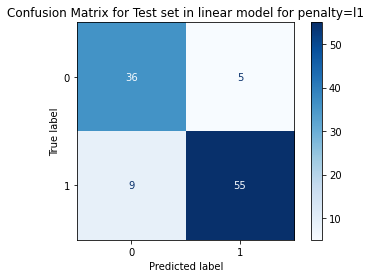

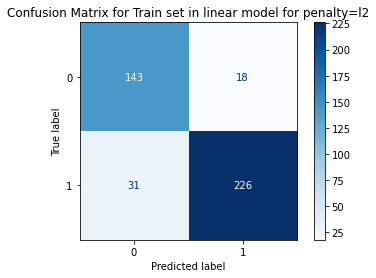

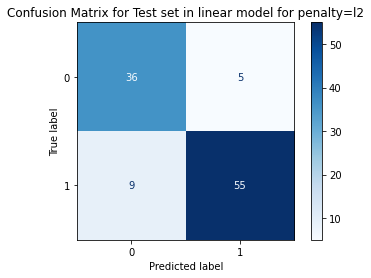

The parameters for Two Features linear model with penalty=l1:
The Train Parameters:
Train AUC is 0.92. 
Train F1 is 0.90. 
Train Loss is 0.30. 
Train Accuracy is 0.88.
The Test Parameters:
Test AUC is 0.89. 
Test F1 is 0.89. 
Test Loss is 0.36. 
Test Accuracy is 0.87.
The parameters for linear model with penalty=l2:
The Train Parameters:
Train AUC is 0.92. 
Train F1 is 0.90. 
Train Loss is 0.31. 
Train Accuracy is 0.88.
The Test Parameters:
Test AUC is 0.89. 
Test F1 is 0.89. 
Test Loss is 0.37. 
Test Accuracy is 0.87.
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] svm__C=1, svm__degree=2, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=2, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.917, test=0.920), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=2, svm__ker

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=2, svm__kernel=poly, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.857, test=0.823), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=2, svm__kernel=poly, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928, test=0.918), recall=(train=0.883, test=0.865), roc_auc=(train=0.852, test=0.843), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=2, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.845, test=0.873), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=2, svm__kernel=poly, accuracy=(train=0.878, test=0.904

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


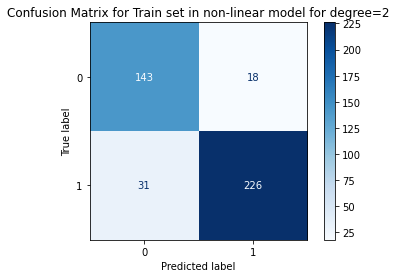

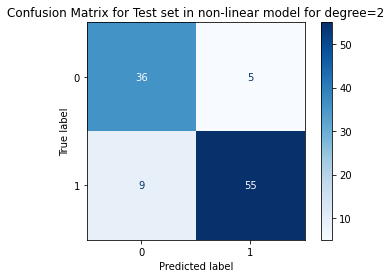

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] svm__C=1, svm__degree=3, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.917, test=0.920), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.924, test=0.904), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__kernel=rbf ........................
[CV]  svm__C=1, svm__degree=3, svm__kernel=rbf, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928, test=0.918), recall=(train=0.883, test=0.865), roc_auc=(train=0.852, test=0.843), total=   0.0s
[CV] svm__C=1, svm__degre

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  svm__C=1, svm__degree=3, svm__kernel=poly, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=3, svm__kernel=poly, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928, test=0.918), recall=(train=0.883, test=0.865), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=3, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.935), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__kernel=poly .......................
[CV]  svm__C=1, svm__degree=3, svm__kernel=poly, accuracy=(train=0.878, test=0.90

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s finished


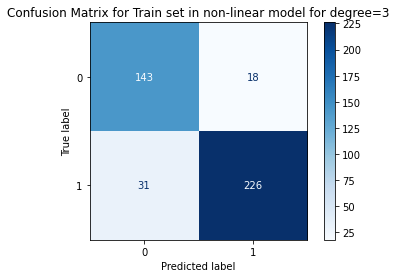

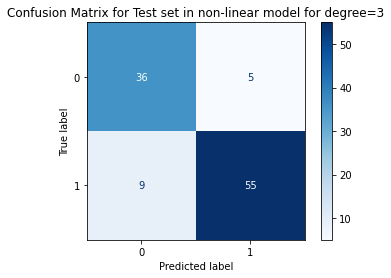

The parameters for Two Features non-linear model with degree = 2:
The Train Parameters:
Train AUC is 0.85. 
Train F1 is 0.90. 
Train Loss is 0.35. 
Train Accuracy is 0.88.
The Test Parameters:
Test AUC is 0.85. 
Test F1 is 0.89. 
Test Loss is 0.38. 
Test Accuracy is 0.87.
The parameters for non-linear model with degree = 3:
The Train Parameters:
Train AUC is 0.92. 
Train F1 is 0.90. 
Train Loss is 0.30. 
Train Accuracy is 0.88.
The Test Parameters:
Test AUC is 0.88. 
Test F1 is 0.89. 
Test Loss is 0.37. 
Test Accuracy is 0.87.


In [13]:
#d
X_train_twofeat = X_train_h[:,[2,3]]
X_test_twofeat = X_test_h[:,[1,2]]
X_tr_twofeat = scaler.fit_transform(X_train_twofeat)
X_tst_twofeat = scaler.transform(X_test_twofeat)
# Finding the best lambda for l1 and l2 with two feature model
#for l1
l_one_twofeat = valid_and_tune('l1',X_train_h,y_train_h)
print('Best lambda value for l1 is %i' % l_one_twofeat[1])
#for l2
l_two_twofeat = valid_and_tune('l2',X_train_h,y_train_h)
print('Best lambda value for l2 is %i' % l_two_twofeat[1])

#Linear
scaler = StandardScaler()
x_tr_twofeat = scaler.fit_transform(X_train_twofeat)
x_tst_twofeat = scaler.transform(X_test_twofeat)
lmbda_l1_twofeat = l_one_twofeat[1]
lmbda_l2_twofeat = l_two_twofeat[1]
#parameter calculation for l1
[AUROC_train_l1_twofeat ,F1_train_l1_twofeat ,Loss_train_l1_twofeat ,ACC_train_l1_twofeat ,AUROC_test_l1_twofeat ,F1_test_l1_twofeat ,Loss_test_l1_twofeat ,ACC_test_l1_twofeat ] = lin_trainer(x_tr_twofeat ,x_tst_twofeat ,y_train_h ,y_test_h ,penal='l1',solver=l_one_twofeat [0],lmbda = l_one_twofeat [1])
#parameter calculation for l2
[AUROC_train_l2_twofeat ,F1_train_l2_twofeat ,Loss_train_l2_twofeat ,ACC_train_l2_twofeat ,AUROC_test_l2_twofeat ,F1_test_l2_twofeat ,Loss_test_l2_twofeat ,ACC_test_l2_twofeat ] = lin_trainer(x_tr_twofeat ,x_tst_twofeat ,y_train_h,y_test_h,penal='l2',solver=l_two_twofeat [0],lmbda = l_two_twofeat [1])

print('The parameters for Two Features linear model with penalty=l1:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_l1_twofeat,F1_train_l1_twofeat,Loss_train_l1_twofeat,ACC_train_l1_twofeat))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_l1_twofeat,F1_test_l1_twofeat,Loss_test_l1_twofeat,ACC_test_l1_twofeat))
print('The parameters for linear model with penalty=l2:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_l2_twofeat,F1_train_l2_twofeat,Loss_train_l2_twofeat,ACC_train_l2_twofeat))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_l2_twofeat,F1_test_l2_twofeat,Loss_test_l2_twofeat,ACC_test_l2_twofeat))

#Non-linear

#parameter calculation for degree = 2
[AUROC_train_deg2_twofeat,F1_train_deg2_twofeat,Loss_train_deg2_twofeat,ACC_train_deg2_twofeat,AUROC_test_deg2_twofeat,F1_test_deg2_twofeat,Loss_test_deg2_twofeat,ACC_test_deg2_twofeat] = non_lin_trainer(x_tr_twofeat,x_tst_twofeat,y_train_h,y_test_h,degree=degree2) #here it is the same x_tr and x_tst as in the inputs for the previous function
#parameter calculation for degree = 3
[AUROC_train_deg3_twofeat,F1_train_deg3_twofeat,Loss_train_deg3_twofeat,ACC_train_deg3_twofeat,AUROC_test_deg3_twofeat,F1_test_deg3_twofeat,Loss_test_deg3_twofeat,ACC_test_deg3_twofeat] = non_lin_trainer(x_tr_twofeat,x_tst_twofeat,y_train_h,y_test_h,degree = degree3) #here it is the same x_tr and x_tst as in the inputs for the previous function

print('The parameters for Two Features non-linear model with degree = 2:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_deg2_twofeat,F1_train_deg2_twofeat,Loss_train_deg2_twofeat,ACC_train_deg2_twofeat))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_deg2_twofeat,F1_test_deg2_twofeat,Loss_test_deg2_twofeat,ACC_test_deg2_twofeat))
print('The parameters for non-linear model with degree = 3:')
print('The Train Parameters:')
print('Train AUC is {:.2f}. \nTrain F1 is {:.2f}. \nTrain Loss is {:.2f}. \nTrain Accuracy is {:.2f}.'.format(AUROC_train_deg3_twofeat,F1_train_deg3_twofeat,Loss_train_deg3_twofeat,ACC_train_deg3_twofeat))
print('The Test Parameters:')
print('Test AUC is {:.2f}. \nTest F1 is {:.2f}. \nTest Loss is {:.2f}. \nTest Accuracy is {:.2f}.'.format(AUROC_test_deg3_twofeat,F1_test_deg3_twofeat,Loss_test_deg3_twofeat,ACC_test_deg3_twofeat))


Answer for e:
Note: we did not accomplished the dimentional reduction in C (the section was canceled from the project) so we will answer this question theoritcally.
Dimention reduction is reducing the data  from a high-dimensional space into a low-dimensional space. By this technique we retain some of the important and meaningful proprities of the data with reduction in dimention which might help in handling big data with a lot of features.
While data reduction helps in preserving the meaningful data and helps in emphasizing this data in the learning process, we would expect from data reduction to contribute to the learning process and thus improve the model performance. Thus we would expect better results in the model with the dimention reduction compared to the regular model (for example: better AUROC and accuracy).